# Random Forest - Wine Quality Dataset

## Overview
Random Forest is an ensemble method that builds multiple decision trees
using bootstrap samples and feature randomness. The predictions of all trees
are aggregated (majority vote for classification) to improve accuracy and reduce overfitting.

This notebook uses Random Forest to classify wines as high-quality or low-quality.


# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 2. Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

X = data.drop('quality', axis=1).values
y = (data['quality'] >= 6).astype(int).values  # Binary classification

data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Preprocessing

In [4]:
# Split dataset into training and testing sets.
# Feature scaling is NOT required for Random Forests.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 4. Train Random Forest Model

In [5]:
# Initialize and train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    random_state=42
)

rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")


Random Forest Test Accuracy: 0.7688


# 5. Evaluation

In [6]:
# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[116  33]
 [ 41 130]]

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       149
           1       0.80      0.76      0.78       171

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



# 6. Feature Importance Visualization

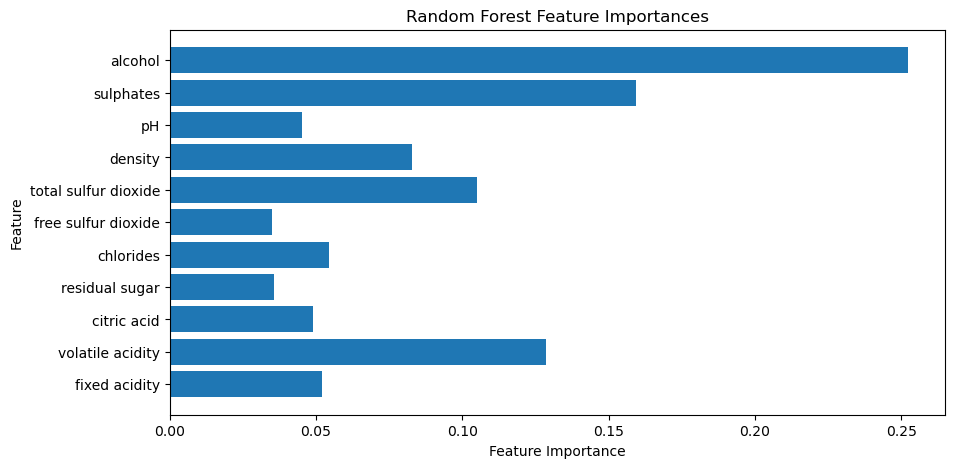

In [7]:
# Plot feature importances
importances = rf.feature_importances_
features = data.drop('quality', axis=1).columns

plt.figure(figsize=(10,5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances")
plt.show()


# 7. Testing

In [8]:
# 1. Shape checks
assert X_train.shape[0] == y_train.shape[0], "Training data mismatch"
assert X_test.shape[0] == y_test.shape[0], "Testing data mismatch"

# 2. Prediction shape
assert y_pred.shape == y_test.shape, "Prediction shape mismatch"

# 3. Accuracy sanity
assert 0.5 <= accuracy <= 1.0, f"Unexpected accuracy: {accuracy}"

# 4. Estimator count check
assert len(rf.estimators_) == 100, "Incorrect number of trees"

# 5. Reproducibility
rf2 = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf2.fit(X_train, y_train)
y_pred2 = rf2.predict(X_test)

np.testing.assert_array_equal(y_pred, y_pred2)

print("All tests passed ✅")


All tests passed ✅


# 8. Summary & Discussion

- Random Forest achieved strong classification performance on the Wine Quality dataset.
- Feature importance provides insight into which chemical properties influence quality most.
- The model is robust and reduces overfitting compared to a single Decision Tree.
- Random Forests do not require feature scaling and handle noisy data well.
- Inline testing ensures the model is correct, reproducible, and robust.
